In [ ]:
#Notas:
"""
- Importamos librerias
- Abrimos CSV's
- Exploración de los datos (Exploratory Data Analysis)
- Analisis tradicional
- Enriquecimiento de datos (ejemplo: Precio medio de la electricidad en EEUU )
- Modelo predictivo
- Explainable data = SHAP library

EXTRAS: Feature engineering

Que tenemos que hacer¿?:

we have to predict the weekly sales of the store with given parameters.

-------

en un mundo dominado por el comercio electronico, el supermercado minorista
walmart quiere anticiparse a la demanda para poder ofrecer al cliente lo que necesita
cuando lo necesita sobre todo teniendo tntas categorias de producto, desde comestibles
hasta ropa y electronca.

En total tenemos los datos de 45 tiendas de diferentes regiones de Estados Unidos.

los momentos más fuertes de la demanda son 4 desde festivos

4 grandes festivos = Super Bowl, el Día del Trabajo, el Día de Acción de Gracias y la Navidad

y walmart hace estrategias promocionales para aumentar sus ventas.

Tenemos un data set de las ventas desde feb-2010 a oct-2012 con 421.570 registros
comprendidos por un total de 143 semanas de datos de ventas

El objetivo del proyecto es recopilar la información de 

cual es la venta media de las tiendas en cada festivo, 
cual es el festivo que más vende y en que departamento, 
prediccion / inferencia de las ventas de los proximos festivos para evitar rotura de stock

entre otros para comunicarles esta info a los diferentes stakeholder y que 
cada departamento pueda tomar las medidas necesarias tanto para anticipar la compra del stock
idear las estrategias promocionales correctas

Explicar como lo voy a hacer

SKLEARN analisis tradicional o estatico

PROHET analisis dinamico

Explicatividad de los datos para comunicarselos a los stakeholder 
(un grafico con los pesos) donde se vea muy claro para la gente no tecnica

Hacer diferentes jupyters para cada parte del proyecto 3 jupyters

Hacerlo para cada tienda

grup by por ventas y ordenarlas por tamaño, ventas por metro cuadrado

Como reacciona prohet con tiendas que venden mucho por m2 vs lo otro

grafico de distribucción

"""

In [148]:
#NOTAS PARA MI: SHAPE (antes y despues)

#GRAFICO DE DISTRIBUCIÓN de las tiendas

In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.express as px (tengo que instalar, recomendada por RAS, bonitas visuals)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from statsmodels.tsa.arima_model import ARIMA

In [229]:
# Load data

features = pd.read_csv("Data/raw_walmart_data/features.csv")
stores = pd.read_csv("Data/raw_walmart_data/stores.csv")
train = pd.read_csv("Data/raw_walmart_data/train.csv")
test = pd.read_csv("Data/raw_walmart_data/test.csv")

In [214]:
#Exploring data:
features.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [152]:
stores.head(3)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392


ConversionError: Failed to convert value(s) to axis units: array(['A', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'B', 'A', 'B', 'A',
       'A', 'B', 'B', 'B', 'B', 'A', 'A', 'B', 'B', 'B', 'A', 'B', 'A',
       'A', 'A', 'B', 'C', 'A', 'A', 'A', 'A', 'B', 'A', 'C', 'C', 'A',
       'A', 'A', 'C', 'C', 'C', 'B'], dtype=object)

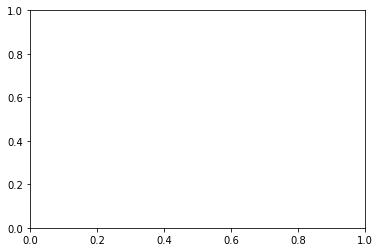

In [211]:
#Hacer un grafico de distribucion de las tiendas para saber que tipo de tiendas tiene que tamaño

plt.hist(stores)
plt.show()

In [153]:
train.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [154]:
test.head(5)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [155]:
print(features.shape)
print(stores.shape)
print(train.shape)

(8190, 12)
(45, 3)
(421570, 5)


In [156]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [157]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [158]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [159]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [160]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [161]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [162]:
train_df = train.merge(features, 'left').merge(stores, 'left')
train_df.head(1)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.5,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [228]:
#TOP 5 tiendas con más ventas

train_df.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)

Store
20    29508.301592
4     29161.210415
14    28784.851727
13    27355.136891
2     26898.070031
10    26332.303819
27    24826.984536
6     21913.243624
1     21710.543621
39    21000.763562
19    20362.126734
23    19776.180881
31    19681.907464
11    19276.762751
24    18969.106500
28    18714.889803
41    17976.004648
32    16351.621855
18    15733.313136
22    15181.218886
12    14867.308619
26    14554.129672
35    13803.596986
40    13763.632803
34    13522.081671
43    13415.114118
8     13133.014768
17    12954.393636
45    11662.897315
42    11443.370118
21    11283.435496
25    10308.157810
37    10297.355026
15     9002.493073
9      8772.890379
30     8764.237719
36     8584.412563
7      8358.766148
29     8158.810609
16     7863.224124
38     7492.478460
3      6373.033983
44     6038.929814
33     5728.414053
5      5053.415813
Name: Weekly_Sales, dtype: float64

In [169]:
train_df.shape

(421570, 16)

In [163]:
train.head(1)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.5,False


In [164]:
features.head(1) 

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [165]:
stores.head(3)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392


In [166]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000
MarkDown5,151432.0,4628.975079,5962.887455,135.160,1878.440000,3359.45000,5563.800000,108519.280000


In [171]:
#para ver cuantos valores vacios tenemos

train_df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

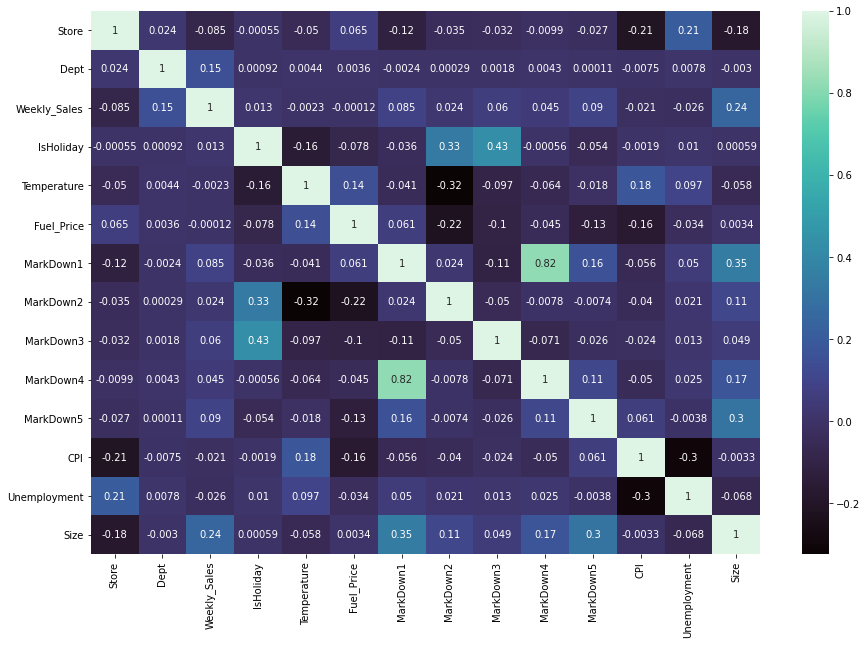

In [167]:
#see the correlation between the columns

correlation = train_df.corr()

plt.figure(figsize = (15,10))
sns.heatmap(correlation, annot= True, cmap = "mako")
plt.show()